Clayton Cohn <br>
15 Nov 2022 <br>
DS5899: Transformers <br>
Vanderbilt University <br>

## <center> Emotion Classifier

This notebook uses a KNN/scikit-learn [implementation](https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75) c/o [@Sanjay.M](https://msanjay-ds.medium.com/) on Towards Data Science. The author thanks him for making his code publicly available for use.

This notebook was created by Clayton Cohn for his DS5899: Transformers class project on evaluating "educational" emotion detection in speech via Audeering.

## Import Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
PATH = "drive/My Drive/DS5899_Transformers/emotions.csv"

In [3]:
import pandas as pd

df = pd.read_csv(PATH, header=0)
df

,file,text,arousal,dominance,valence,label
0,confusion_0.wav,This just isn't making sense to me.,0.491061,0.579337,0.199595,confusion
1,confusion_1.wav,I'm just not getting it.,0.496632,0.564744,0.250415,confusion
2,confusion_2.wav,I don't think I understand what you mean.,0.340029,0.463059,0.223187,confusion
3,confusion_3.wav,Why won't the code run?,0.476211,0.533171,0.327067,confusion
4,confusion_4.wav,"Wait, so what are you talking about?",0.452598,0.498192,0.518139,confusion
5,eureka_0.wav,"Aha, finally!",0.779292,0.827495,0.942782,eureka
6,eureka_1.wav,"Ohhh, yeah that makes so much sense!",0.614347,0.624977,0.468896,eureka
7,eureka_2.wav,"Of course, now I get it!",0.594661,0.659573,0.474535,eureka
8,eureka_3.wav,That was so easy!,0.732855,0.750316,0.576097,eureka
9,eureka_4.wav,I can't believe I didn't figure that out earli...,0.644227,0.692528,0.307335,eureka


## Extract Features and Labels

In [4]:
import numpy as np

features = df[["arousal", "dominance", "valence"]].to_numpy()
features[:5]

array([[0.49106094, 0.5793368 , 0.1995954 ],
       [0.49663165, 0.5647438 , 0.25041533],
       [0.34002945, 0.46305895, 0.2231871 ],
       [0.47621134, 0.5331708 , 0.32706666],
       [0.45259786, 0.49819237, 0.5181389 ]])

In [5]:
labels = df["label"].to_numpy()
labels[:5]

array(['confusion', 'confusion', 'confusion', 'confusion', 'confusion'],
      dtype=object)

## Apply ML Methods

Due to the small amount of data, I will use LOOCV.

In [6]:
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
loocv.get_n_splits(features)

20

### KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier

y_preds_knn = []
y_trues_knn = []

K = 3

for tr_i, tst_i in loocv.split(features):
  # print(f"Started iteration {tst_i[0]}.")
  X_train, X_test = features[tr_i], features[tst_i]
  y_train, y_test = labels[tr_i], labels[tst_i]
  
  y_trues_knn.append(y_test[0])
  
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  y_preds_knn.append(y_pred[0])

print("KNN")
print(f"y_preds:\t{y_preds_knn}")
print(f"y_trues:\t{y_trues_knn}")

KNN
y_preds:	['confusion', 'confusion', 'confusion', 'confusion', 'neutral', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'confusion', 'neutral', 'neutral', 'neutral']
y_trues:	['confusion', 'confusion', 'confusion', 'confusion', 'confusion', 'eureka', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

target_names = list(set(labels))
report_knn = classification_report(y_trues_knn, y_preds_knn, \
                               target_names=target_names, output_dict=False)

print(report_knn)

              precision    recall  f1-score   support

 frustration       0.80      0.80      0.80         5
      eureka       0.80      0.80      0.80         5
   confusion       0.80      0.80      0.80         5
     neutral       0.80      0.80      0.80         5

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

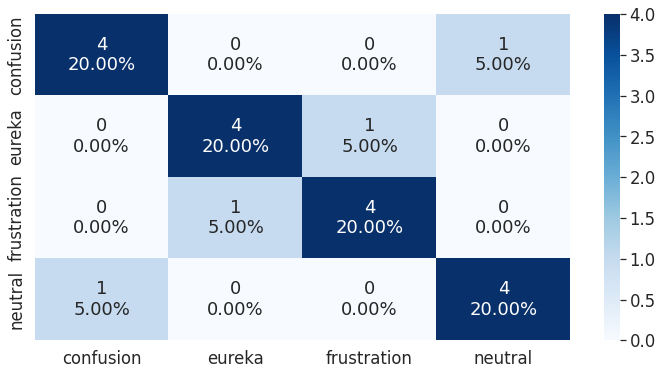

In [10]:
categories = ["confusion", "eureka", "frustration", "neutral"]
cf_matrix = confusion_matrix(y_trues_knn, y_preds_knn)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in \
                     cf_matrix.flatten()/np.sum(cf_matrix)]
t_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(4,4)
sns.heatmap(cf_matrix, annot=t_labels, fmt='', \
    cmap='Blues', xticklabels=categories,yticklabels=categories)

### Naïve Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

y_preds_nb = []
y_trues_nb = []

for tr_i, tst_i in loocv.split(features):
  # print(f"Started iteration {tst_i[0]}.")
  X_train, X_test = features[tr_i], features[tst_i]
  y_train, y_test = labels[tr_i], labels[tst_i]
  
  y_trues_nb.append(y_test[0])
  
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  y_pred = nb.predict(X_test)
  y_preds_nb.append(y_pred[0])

print("Naïve Bayes")
print(f"y_preds:\t{y_preds_nb}")
print(f"y_trues:\t{y_trues_nb}")

Naïve Bayes
y_preds:	['confusion', 'confusion', 'neutral', 'confusion', 'neutral', 'frustration', 'eureka', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'confusion', 'neutral', 'neutral', 'neutral']
y_trues:	['confusion', 'confusion', 'confusion', 'confusion', 'confusion', 'eureka', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [12]:
target_names = list(set(labels))
report_nb = classification_report(y_trues_nb, y_preds_nb, \
                               target_names=target_names, output_dict=False)

print(report_nb)

              precision    recall  f1-score   support

 frustration       0.75      0.60      0.67         5
      eureka       0.80      0.80      0.80         5
   confusion       0.80      0.80      0.80         5
     neutral       0.67      0.80      0.73         5

    accuracy                           0.75        20
   macro avg       0.75      0.75      0.75        20
weighted avg       0.75      0.75      0.75        20



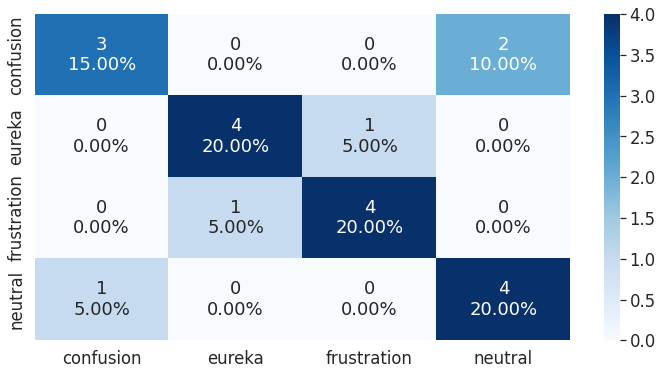

In [13]:
categories = ["confusion", "eureka", "frustration", "neutral"]
cf_matrix = confusion_matrix(y_trues_nb, y_preds_nb)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in \
                     cf_matrix.flatten()/np.sum(cf_matrix)]
t_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(4,4)
sns.heatmap(cf_matrix, annot=t_labels, fmt='', \
    cmap='Blues', xticklabels=categories,yticklabels=categories)

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

y_preds_dt = []
y_trues_dt = []

for tr_i, tst_i in loocv.split(features):
  # print(f"Started iteration {tst_i[0]}.")
  X_train, X_test = features[tr_i], features[tst_i]
  y_train, y_test = labels[tr_i], labels[tst_i]
  
  y_trues_dt.append(y_test[0])
  
  dt = DecisionTreeClassifier(random_state=0)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  y_preds_dt.append(y_pred[0])

print("Decision Tree")
print(f"y_preds:\t{y_preds_dt}")
print(f"y_trues:\t{y_trues_dt}")

Decision Tree
y_preds:	['confusion', 'confusion', 'neutral', 'confusion', 'neutral', 'frustration', 'frustration', 'frustration', 'eureka', 'frustration', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'confusion', 'confusion', 'neutral', 'neutral', 'neutral']
y_trues:	['confusion', 'confusion', 'confusion', 'confusion', 'confusion', 'eureka', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [15]:
target_names = list(set(labels))
report_dt = classification_report(y_trues_dt, y_preds_dt, \
                               target_names=target_names, output_dict=False)

print(report_dt)

              precision    recall  f1-score   support

 frustration       0.60      0.60      0.60         5
      eureka       0.50      0.20      0.29         5
   confusion       0.50      0.80      0.62         5
     neutral       0.60      0.60      0.60         5

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.53        20
weighted avg       0.55      0.55      0.53        20



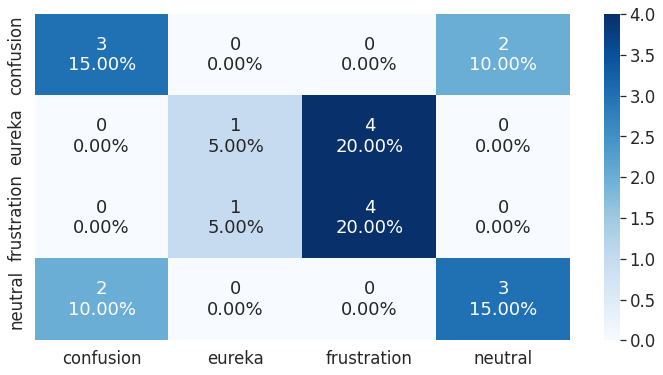

In [16]:
categories = ["confusion", "eureka", "frustration", "neutral"]
cf_matrix = confusion_matrix(y_trues_dt, y_preds_dt)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in \
                     cf_matrix.flatten()/np.sum(cf_matrix)]
t_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(4,4)
sns.heatmap(cf_matrix, annot=t_labels, fmt='', \
    cmap='Blues', xticklabels=categories,yticklabels=categories)

### SVM

In [17]:
from sklearn.svm import SVC

y_preds_svm = []
y_trues_svm = []

for tr_i, tst_i in loocv.split(features):
  # print(f"Started iteration {tst_i[0]}.")
  X_train, X_test = features[tr_i], features[tst_i]
  y_train, y_test = labels[tr_i], labels[tst_i]
  
  y_trues_svm.append(y_test[0])
  
  svm = SVC()
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  y_preds_svm.append(y_pred[0])

print("Decision Tree")
print(f"y_preds:\t{y_preds_svm}")
print(f"y_trues:\t{y_trues_svm}")

Decision Tree
y_preds:	['confusion', 'confusion', 'confusion', 'confusion', 'neutral', 'confusion', 'eureka', 'eureka', 'eureka', 'frustration', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'confusion', 'confusion', 'neutral', 'neutral']
y_trues:	['confusion', 'confusion', 'confusion', 'confusion', 'confusion', 'eureka', 'eureka', 'eureka', 'eureka', 'eureka', 'frustration', 'frustration', 'frustration', 'frustration', 'frustration', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral']


In [18]:
target_names = list(set(labels))
report_svm = classification_report(y_trues_svm, y_preds_svm, \
                               target_names=target_names, output_dict=False)

print(report_svm)

              precision    recall  f1-score   support

 frustration       0.57      0.80      0.67         5
      eureka       0.75      0.60      0.67         5
   confusion       0.80      0.80      0.80         5
     neutral       0.75      0.60      0.67         5

    accuracy                           0.70        20
   macro avg       0.72      0.70      0.70        20
weighted avg       0.72      0.70      0.70        20



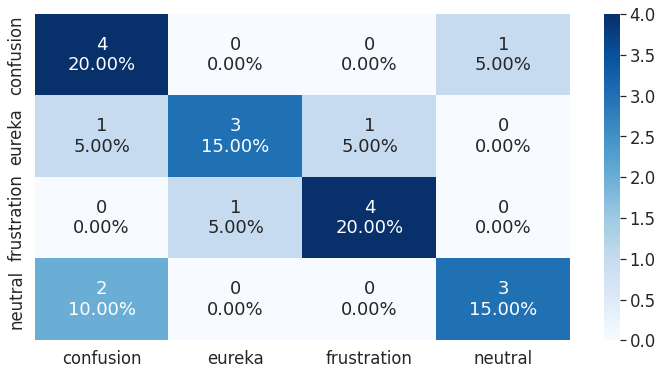

In [19]:
categories = ["confusion", "eureka", "frustration", "neutral"]
cf_matrix = confusion_matrix(y_trues_svm, y_preds_svm)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in \
                     cf_matrix.flatten()/np.sum(cf_matrix)]
t_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
t_labels = np.asarray(t_labels).reshape(4,4)
sns.heatmap(cf_matrix, annot=t_labels, fmt='', \
    cmap='Blues', xticklabels=categories,yticklabels=categories)